# Measurement of the Motion

In [131]:
from capillary import edge, fitting, analyse
from importlib import reload
from scipy.signal import medfilt

In [142]:
from importlib import reload
reload(analyse);
reload(fitting);
reload(edge);

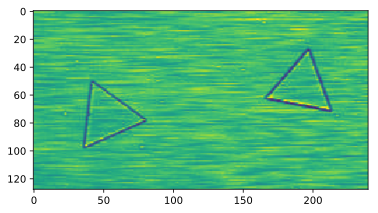

In [132]:
im=edge.R[3](72)
imshow(im);

In image processing, $x$ generally represents row number while $y$ represents column number. This caused a
$\pi/2$ rotation between the original image and the analysed result, i.e. $\theta\to\theta+\pi/2$. To go back to photos, angles should be minused by $\pi/2$.

(1.8069849493219299, 1.6274539440614197)
Processing video 3 frame 72:


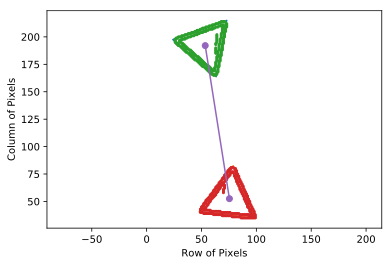

In [135]:
display.show_frame(3, 72);
xlabel('Row of Pixels');
ylabel('Column of Pixels');

If we use $\theta_{21}$ for the angle of vector distance $1\to 2$, and $\theta_{12}$  for $2\to 1$ (with period $2\pi$), then $\theta_{12}-\theta_{21}\equiv\pi$. The angle of $1,2$ is $\phi_1,\phi_2$ (with period $T=2\pi/3$). The angle relative to connecting line is
$$\begin{align}
\theta_1&=\phi_1-\theta_{21}+kT\\
\theta_2&=\phi_2-\theta_{12}+kT
\end{align}$$

<img src="https://raw.githubusercontent.com/peijunz/capillary/master/pos.png" width="20%"></img>
<img src="https://raw.githubusercontent.com/peijunz/capillary/master/position.png" width="50%"></img>

## Data Meaning
+ time is $t-t_\mathrm{contact}$
+ $(x_i, y_i)$ is centroid of triangle $i$
+ err is fitting error
+ $\theta_i, \phi_i, \theta_{12/21}$ are explained above
+ $\rho$ is displacement between two centroids.

In [141]:
analyse.analyse_raw(5).head()

,time,x1,y1,phi1,err1,x2,y2,phi2,err2,rho,theta21,theta1,theta2
Frame,,,,,,,,,,,,,
1,-31.666667,41.891034,133.221323,0.102033,1.883801,116.105042,37.885247,1.348982,1.866345,120.816747,-0.909337,1.011370,-0.883274
2,-31.600000,42.130178,133.279506,0.102198,1.895491,116.396063,37.924707,1.354265,1.838755,120.863391,-0.909093,1.011292,-0.878234
3,-31.533333,41.688846,133.270098,0.105375,1.900523,115.946910,37.865817,1.349410,1.884575,120.897630,-0.909396,1.014771,-0.882787
4,-31.466667,41.968528,133.151094,0.105104,1.916490,116.249270,37.930680,1.346459,1.851690,120.766534,-0.908312,1.013416,-0.886821
5,-31.400000,42.009659,133.181299,0.104464,1.949051,116.175583,37.922981,1.348099,1.927480,120.725853,-0.909255,1.013719,-0.884238


In [15]:
tlabel=r'$t-t_c$'
def plot_theta(df):
    plot(array(df['time']), array(df['theta1']), '+', alpha=0.5, label=r'$\theta_1$');
    plot(array(df['time']), array(df['theta2']), '+', alpha=0.5, label=r'$\theta_2$');
    xlabel(tlabel);
    legend()
    grid();
def plot_rho(df):
    plot(array(df['time']), array(df['rho']), '+', label=r"$R$")
    title('Displacement')
    xlabel(tlabel);
    grid();
    ylabel(r'$\rho/$px');

## Video 5

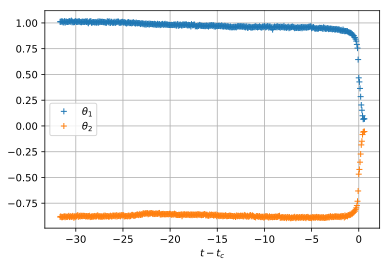

In [124]:
df=analyse.analyse_raw(5)
plot_theta(df)

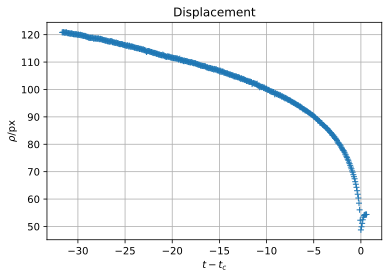

In [125]:
plot_rho(df)

## Video 7

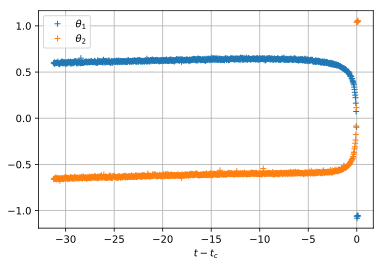

In [136]:
df=analyse.analyse_raw(7)
plot_theta(df)

## Export all data of videos to Excel

In [129]:
analyse.to_excel(range(1,8))